### Arash Latifi
### Dec 2022

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import tensorflow.keras.layers as tfl

## Load the Data

In [2]:
(train_X_orig, train_y_orig), (test_X_orig, test_y_orig) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## Normalize Input

In [3]:
train_X = train_X_orig.reshape((train_X_orig.shape[0], 28, 28, 1)).astype('float32')
train_X = train_X/255.
test_X = test_X_orig.reshape((test_X_orig.shape[0], 28, 28, 1)).astype('float32')
test_X = test_X/255.
print ("train_X shape: " + str(train_X.shape))
print ("test_X shape: " + str(test_X.shape))

train_X shape: (60000, 28, 28, 1)
test_X shape: (10000, 28, 28, 1)


## One Hot test data

In [4]:
train_y = np_utils.to_categorical(train_y_orig)
test_y = np_utils.to_categorical(test_y_orig)

print ("train_y shape: " + str(train_y.shape))
print ("test_y shape: " + str(test_y.shape))

train_y shape: (60000, 10)
test_y shape: (10000, 10)


## Convolutional Model

In [5]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(10, 4, activation='relu')(input_img)
    P1 = tfl.MaxPool2D()(Z1)

    Z2 = tfl.Conv2D(20, 2, activation='relu')(P1)
    P2 = tfl.MaxPool2D()(Z2)
    # D2 = tfl.Dropout(0.05)(P2)

    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(10, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [6]:
conv_model = convolutional_model((28, 28, 1))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 25, 25, 10)        170       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 20)        820       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 20)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 500)               0     

## Train the Model

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y)).batch(256)
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_y)).batch(256)
history = conv_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
235/235 [==============================] - 9s 7ms/step - loss: 0.7223 - accuracy: 0.8024 - val_loss: 0.2353 - val_accuracy: 0.9327
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1926 - accuracy: 0.9433 - val_loss: 0.1321 - val_accuracy: 0.9617
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1296 - accuracy: 0.9618 - val_loss: 0.1000 - val_accuracy: 0.9704
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1041 - accuracy: 0.9693 - val_loss: 0.0853 - val_accuracy: 0.9740
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0898 - accuracy: 0.9731 - val_loss: 0.0768 - val_accuracy: 0.9769
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0805 - accuracy: 0.9758 - val_loss: 0.0708 - val_accuracy: 0.9787
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0737 - accuracy: 0.9777 - val_loss: 0.0662 - val_accuracy: 0.9794
Epoch 

In [8]:
pd.options.mode.chained_assignment = None
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss', 'val_loss']]
df_loss.rename(columns={'loss':'train', 'val_loss':'validation'}, inplace=True)
df_acc= df_loss_acc[['accuracy', 'val_accuracy']]
df_acc.rename(columns={'accuracy':'train', 'val_accuracy':'validation'}, inplace=True)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

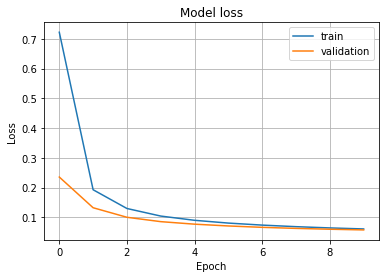

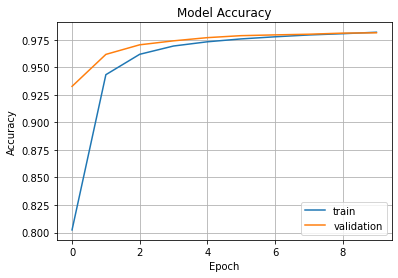

In [9]:
df_loss.plot(title='Model loss', figsize=(6,4), grid=True).set(xlabel='Epoch', ylabel='Loss')
df_acc.plot(title='Model Accuracy', figsize=(6,4), grid=True).set(xlabel='Epoch', ylabel='Accuracy')